In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../dataset/MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400


In [3]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
0,0.0,0.097222,NaN,NaN
1,0.0,0.100694,NaN,NaN
2,0.0,0.102431,NaN,NaN
3,0.0,0.099826,NaN,NaN
4,0.0,0.098090,NaN,NaN
...,...,...,...,...
9003,0.0,330.589996,343.109985,94.070000
9004,0.0,330.079987,343.109985,94.129997
9005,0.0,329.489990,343.109985,94.129997
9006,0.0,323.010010,343.109985,94.129997


In [4]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [5]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 902: cannot sell anything, inventory 0
day 903: cannot sell anything, inventory 0
day 904: cannot sell anything, inventory 0
day 912: cannot sell anything, inventory 0
day 913: cannot sell anything, inventory 0
day 929: cannot sell anything, inventory 0
day 931: cannot sell anything, inventory 0
day 962: cannot sell anything, inventory 0
day 963: cannot sell anything, inventory 0
day 964: cannot sell anything, inventory 0
day 974: cannot sell anything, inventory 0
day 994: cannot sell anything, inventory 0
day 995: cannot sell anything, inventory 0
day 996: cannot sell anything, inventory 0
day 1004: cannot sell anything, inventory 0
day 1005: cannot sell anything, inventory 0
day 1008: cannot sell anything, inventory 0
day 1009: cannot sell anything, inventory 0
day 1010: cannot sell anything, inventory 0
day 1013: cannot sell anything, inventory 0
day 1014: cannot sell anything, inventory 0
day 1015: cannot sell anything, inventory 0
day 1027: cannot sell anything, inventory 0
da

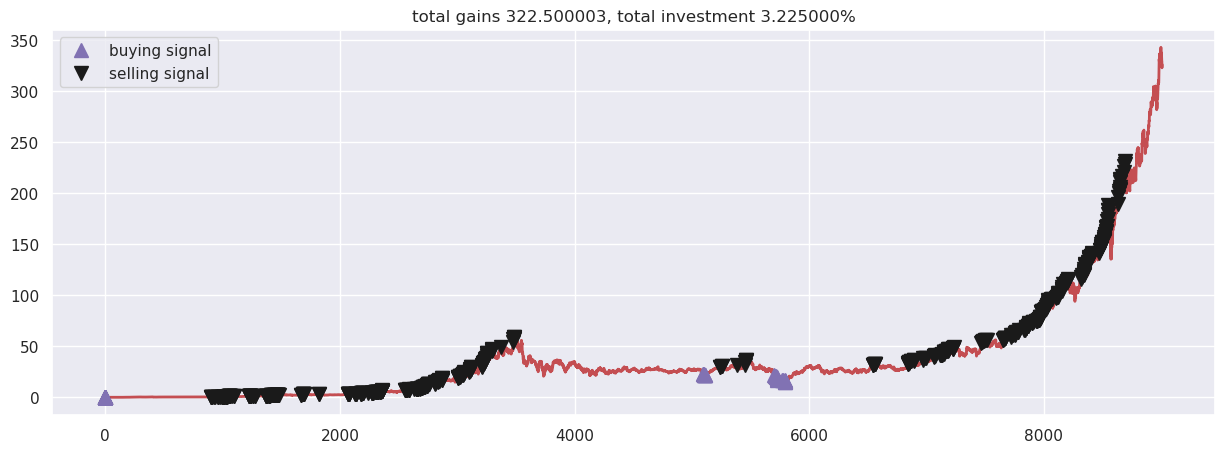

In [6]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()